# Tutorial based on ['usage guide' from matplotlib offical guide](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

In [1]:
# preparing
import matplotlib.pyplot as plt
import numpy as np

## A simple example

Matplotlib graphs your data on `Figure`s (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more `Axes` (i.e., an area where points can be specified in terms of x-y coordinates, or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The simplest way of creating a figure with an axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the axes:

>  matplotlib.figure.Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)

The top level container for all the plot elements.

> matplotlib.axes.Axes(fig, rect, *, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)

The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.

> matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)

Create a figure and a set of subplots.


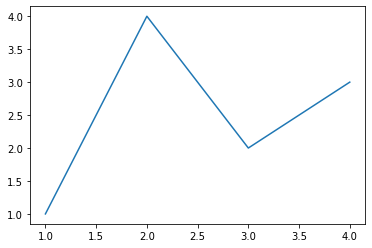

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

you can ignore manipulation with axis

for each `Axes` graphing method, there is a corresponding function in the `matplotlib.pyplot` module that performs that plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. So, the previous example can be written more shortly as

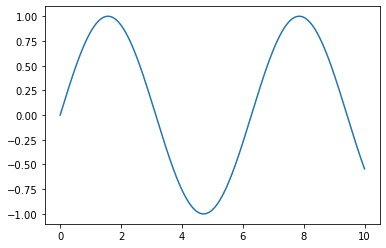

In [14]:
# create  matplotlib plot
plt.plot(np.linspace(0, 10, 1000), np.sin(np.linspace(0, 10, 1000)))

## Parts of a Figure

![](./images/anatomy.webp)

### Figure [link to doc](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)

The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. **A figure can contain any number of Axes, but will typically have at least one**.



The easiest way to create a new figure is with pyplot

In [18]:
# an empty figure with no Axes
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

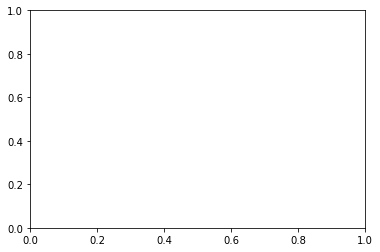

In [20]:
# a figure with a single Axes
fig, ax = plt.subplots()

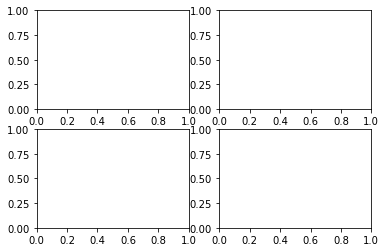

In [21]:
# a figure with a 2x2 grid of axes
fig, axs = plt.subplots(2,2)

It's convenient to create the axes together with the figure, but you can also add axes later on, allowing for more complex axes layouts.

### Axes [link to doc](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes)

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many `Axes`, but a given `Axes object` can only be in one `Figure`. The `Axes` contains two (or three in the case of 3D) `Axis objects` **(be aware of the difference between Axes and Axis)** which take care of the data limits (the data limits can also be controlled via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each `Axes` has a `title` (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

### Axis [link to doc](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis)

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a `Locator object` and the ticklabel strings are formatted by a `Formatter`. The combination of the correct `Locator` and `Formatter` gives very fine control over the tick locations and labels.

### Artist [link to doc](https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist)


Basically, everything you can see on the figure is an artist (even the `Figure`, `Axes`, and `Axis objects`). This includes `Text objects`, `Line2D objects`, `collections objects`, `Patch objects` ... (you get the idea). When the figure is rendered, all of the artists are drawn to the **canvas**. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

### Types of inputs to plotting functions

All of plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input. Classes that are 'array-like' such as `pandas data objects` and `numpy.matrix` may or may not work as intended. **It is best to convert these to numpy.array objects prior to plotting**.

## The object-oriented interface and the pyplot interface


As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

So one can do (OO-style)

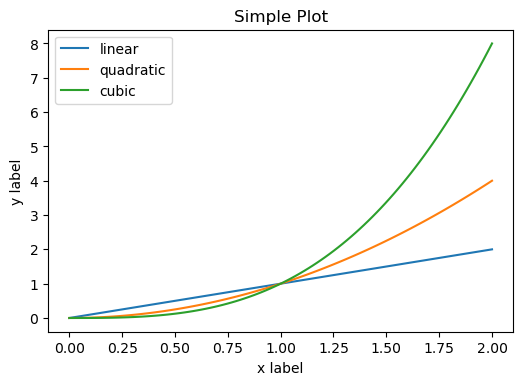

In [36]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.

fig, ax = plt.subplots(dpi=100)  # Create a figure and an axes.
## dpi for size and image clarity

ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.

ax.legend()  # Add a legend.

or Pyplot style

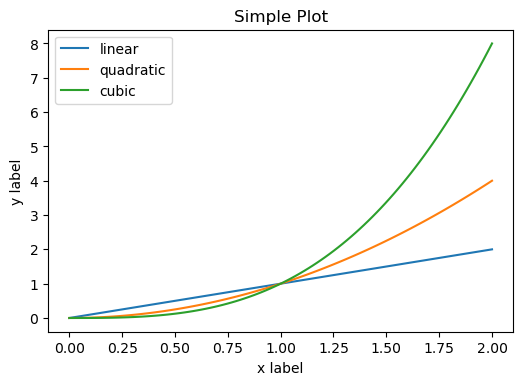

In [37]:
x = np.linspace(0, 2, 100)

plt.figure(dpi=100) # for size and image clarity

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")

plt.legend()

## About choice between OO and pyplot style

You should feel free to use either (however, it is preferable pick one of them and stick to it, instead of mixing them). In general, **we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook)**, and to prefer the **OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project)**.